# Decision Trees

The first part covers a basic implemenntation wthout using any ML libraries

A decision tree works on splitting the data recursively. With each splitting the data becomes more and more organized, such that the randomness or "Entropy" decreases with each split.
the Entropy is calculated by below formulae:
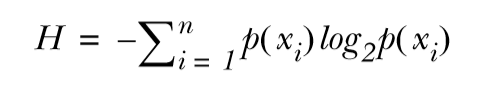

where p(x) is the probability of choosing that class and n represents the total number of classes

The below method in python calculates the Shanon Entropy

In [12]:
from math import log
def calcShanonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    shanonEntropy =0.0
    for eachVect in dataSet:
        currentLabel=eachVect[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shanonEntropy -= prob * log(prob,2)
    return shanonEntropy

testing the above method for a sample dataset

In [13]:
def createDataSet():
    dataset =[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    labels=['no_surfing','flippers']
    return dataset,labels

In [14]:
myDat,labels= createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [15]:
labels

['no_surfing', 'flippers']

In [16]:
print(calcShanonEnt(myDat))

0.9709505944546686


Higher Entropy denotes more mixed up data. To put things in perspective, modifying the dataset to include a third objective

In [17]:
myDat[0][-1]='maybe'
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [18]:
calcShanonEnt(myDat)

1.3709505944546687

In [19]:
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for eachVec in dataSet:
        if eachVec[axis]==value:
            reducedFeatureVector= eachVec[:axis]
            reducedFeatureVector.extend(eachVec[axis+1:])
            retDataSet.append(reducedFeatureVector)
    return retDataSet

Demo of append and extend for those unfamiliar with python conceepts

In [21]:
a=[1,2,3]
b=[4,5,6]
a.append(b)
a

[1, 2, 3, [4, 5, 6]]

In [24]:
a=[1,2,3]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [31]:
myDat2,labels= createDataSet()
splitDataSet(myDat2,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

Information Gain:
The change in information before and after the split in decision trees is called as Information Gain. The split with the highest information gain will be the chosen one.
To determine the best split the shanon entropy is used for calculating information gain

In [32]:
def chooseBestFeatureToSplit(dataSet):
    numFeatires = len(dataSet[0])-1
    baseEntropy = calcShanonEnt(dataSet)
    bestInfoGain=0.0
    bestFeature=-1
    for i in range(numFeatires):
        featList= [ex[i] for ex in dataSet]
        uniqueVal = set(featList)
        newEntropy = 0.0
        for val in uniqueVal:
            subDataSet = splitDataSet(dataSet,i,val)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShanonEnt(subDataSet)
        infGain = baseEntropy-newEntropy
        if(infGain>bestInfoGain):
            bestInfoGain=infGain
            bestFeature=i
    return bestFeature

In [33]:
myDat3,labels=createDataSet()
chooseBestFeatureToSplit(myDat3)

0

To build a decision tree the dataset must be split recursively.With each split calculating the best feature.
The split must go on till all the instances in a branch are same class or there are no attributes available to split upon